In [1]:
#Importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

### **Loading Data**

In [2]:
data = pd.read_csv('medium.csv')


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#no of rows and columns
data.shape

(531, 10)

In [5]:
#getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Car_Make                   531 non-null    object
 1   Car_Model                  531 non-null    object
 2   Year                       531 non-null    int64 
 3   Kms_Driven                 531 non-null    int64 
 4   Engine_Oil_Change          531 non-null    int64 
 5   Brake_Pad_Change           531 non-null    int64 
 6   Transmission_Fluid_Change  531 non-null    int64 
 7   Tire_Rotation              531 non-null    int64 
 8   Spark_Plug_Change          531 non-null    int64 
 9   Maintenance_Required       531 non-null    object
dtypes: int64(7), object(3)
memory usage: 41.6+ KB


In [6]:
#for first 5 rows
data.head()

Car_Make     Car_Model  Year  Kms_Driven  Engine_Oil_Change  \
0   Maruti   Suzuki Alto  2008       30000              25000   
1  Hyundai           i10  2010       35000              30000   
2     Tata        Indica  2012       40000              35000   
3    Honda          City  2015       45000              40000   
4   Maruti  Suzuki Swift  2017       50000              45000   

   Brake_Pad_Change  Transmission_Fluid_Change  Tire_Rotation  \
0             40000                      60000          30000   
1             45000                      65000          35000   
2             50000                      70000          40000   
3             55000                      75000          45000   
4             60000                      80000          50000   

   Spark_Plug_Change Maintenance_Required  
0              45000              Absence  
1              50000              Absence  
2              55000              Absence  
3              60000              Absence  
4              65000              Absence

In [7]:
#for last 5 rows
data.tail()

Car_Make Car_Model  Year  Kms_Driven  Engine_Oil_Change  \
526           Audi        A3  2019       30000              10000   
527            BMW  3 Series  2018       40000               8000   
528  Mercedes-Benz   C-Class  2017       50000              10000   
529         Jaguar        XE  2016       60000              12000   
530          Volvo       S60  2015       70000              10000   

     Brake_Pad_Change  Transmission_Fluid_Change  Tire_Rotation  \
526             20000                      40000          10000   
527             16000                      32000           8000   
528             25000                      50000          12500   
529             24000                      48000          12000   
530             20000                      40000          10000   

     Spark_Plug_Change Maintenance_Required  
526              30000              Absence  
527              24000              Absence  
528              37500              Absence  
529              36000              Absence  
530              30000              Absence

In [8]:
#statistical measures about the data
data.describe().T

count          mean           std      min  \
Year                       531.0   2016.342750      3.438302   2008.0   
Kms_Driven                 531.0  39854.990584  22037.610830   3000.0   
Engine_Oil_Change          531.0   7705.084746   6792.317563   2400.0   
Brake_Pad_Change           531.0  34670.433145  15633.619180  10000.0   
Transmission_Fluid_Change  531.0  59325.800377  27474.950393  20000.0   
Tire_Rotation              531.0  23101.694915  14800.179019    500.0   
Spark_Plug_Change          531.0  66038.606403  34980.896635  13000.0   

                               25%      50%      75%       max  
Year                        2014.0   2017.0   2019.0    2023.0  
Kms_Driven                 24000.0  38000.0  52000.0  150000.0  
Engine_Oil_Change           5000.0   5800.0   7500.0   60000.0  
Brake_Pad_Change           25000.0  29000.0  40000.0  110000.0  
Transmission_Fluid_Change  40000.0  49000.0  80000.0  140000.0  
Tire_Rotation              15000.0  22000.0  27000.0  150000.0  
Spark_Plug_Change          42000.0  48000.0  95000.0  155000.0

In [9]:
##feature engineering
#To get null values of column
data.isnull().sum()

Car_Make                     0
Car_Model                    0
Year                         0
Kms_Driven                   0
Engine_Oil_Change            0
Brake_Pad_Change             0
Transmission_Fluid_Change    0
Tire_Rotation                0
Spark_Plug_Change            0
Maintenance_Required         0
dtype: int64

<Axes: >

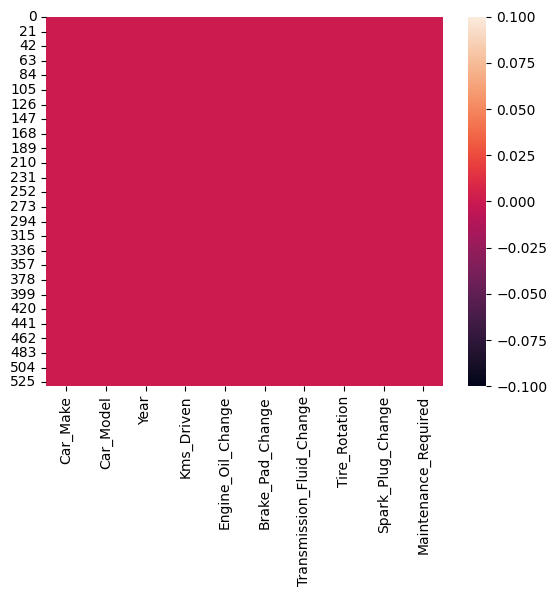

In [10]:
#heatmap to show null values
sns.heatmap(data.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [11]:
data.dtypes

Car_Make                     object
Car_Model                    object
Year                          int64
Kms_Driven                    int64
Engine_Oil_Change             int64
Brake_Pad_Change              int64
Transmission_Fluid_Change     int64
Tire_Rotation                 int64
Spark_Plug_Change             int64
Maintenance_Required         object
dtype: object

### **Data Cleaning And Visualization**

In [12]:
data = data.drop('Car_Make', axis=1)


In [13]:
data = data.drop('Car_Model', axis=1)


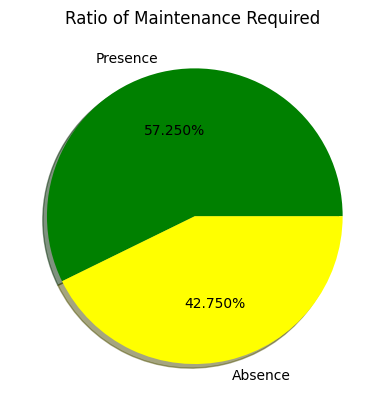

In [14]:
#To show the Fuel type using pie chart
plt.pie(x = data['Maintenance_Required'].value_counts() ,autopct='%1.3f%%' ,labels=['Presence', 'Absence'], colors=['green', 'yellow'], shadow=True)
plt.title('Ratio of Maintenance Required ')
plt.show()


<Axes: xlabel='Maintenance_Required', ylabel='count'>

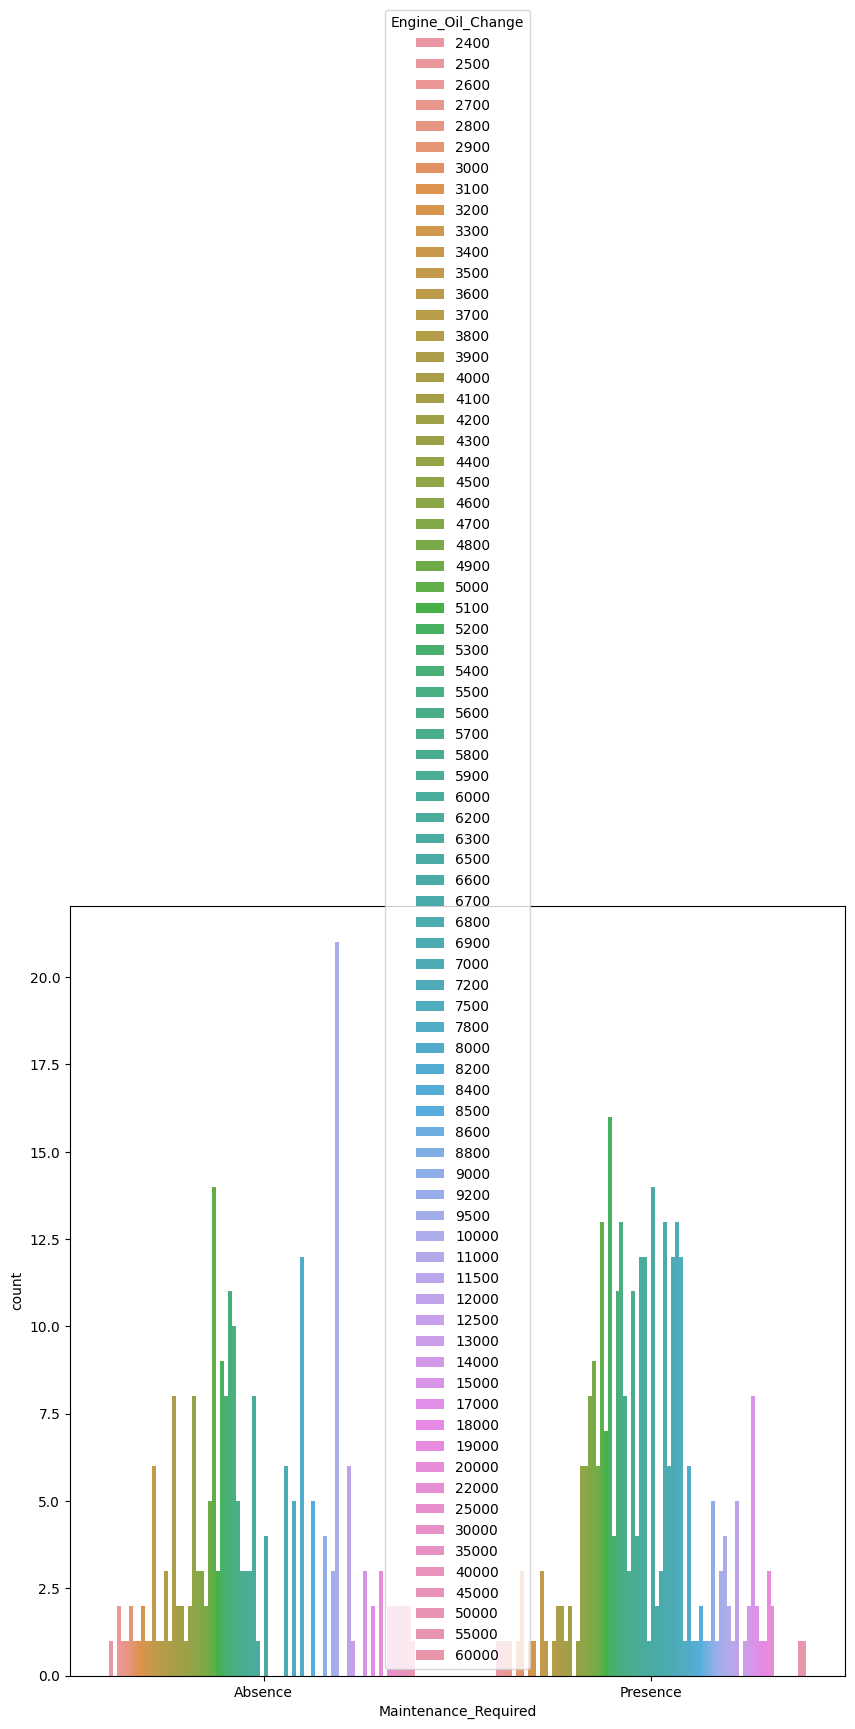

In [15]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(10,10))
sns.countplot(data=data,hue='Engine_Oil_Change',x='Maintenance_Required')

In [16]:
data["Year_old"]=2024-data["Year"]

In [17]:
data = data.drop('Year', axis=1)


In [18]:
# FMaintenance required to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Maintenance_Required"] = encoder.fit_transform(data["Maintenance_Required"])

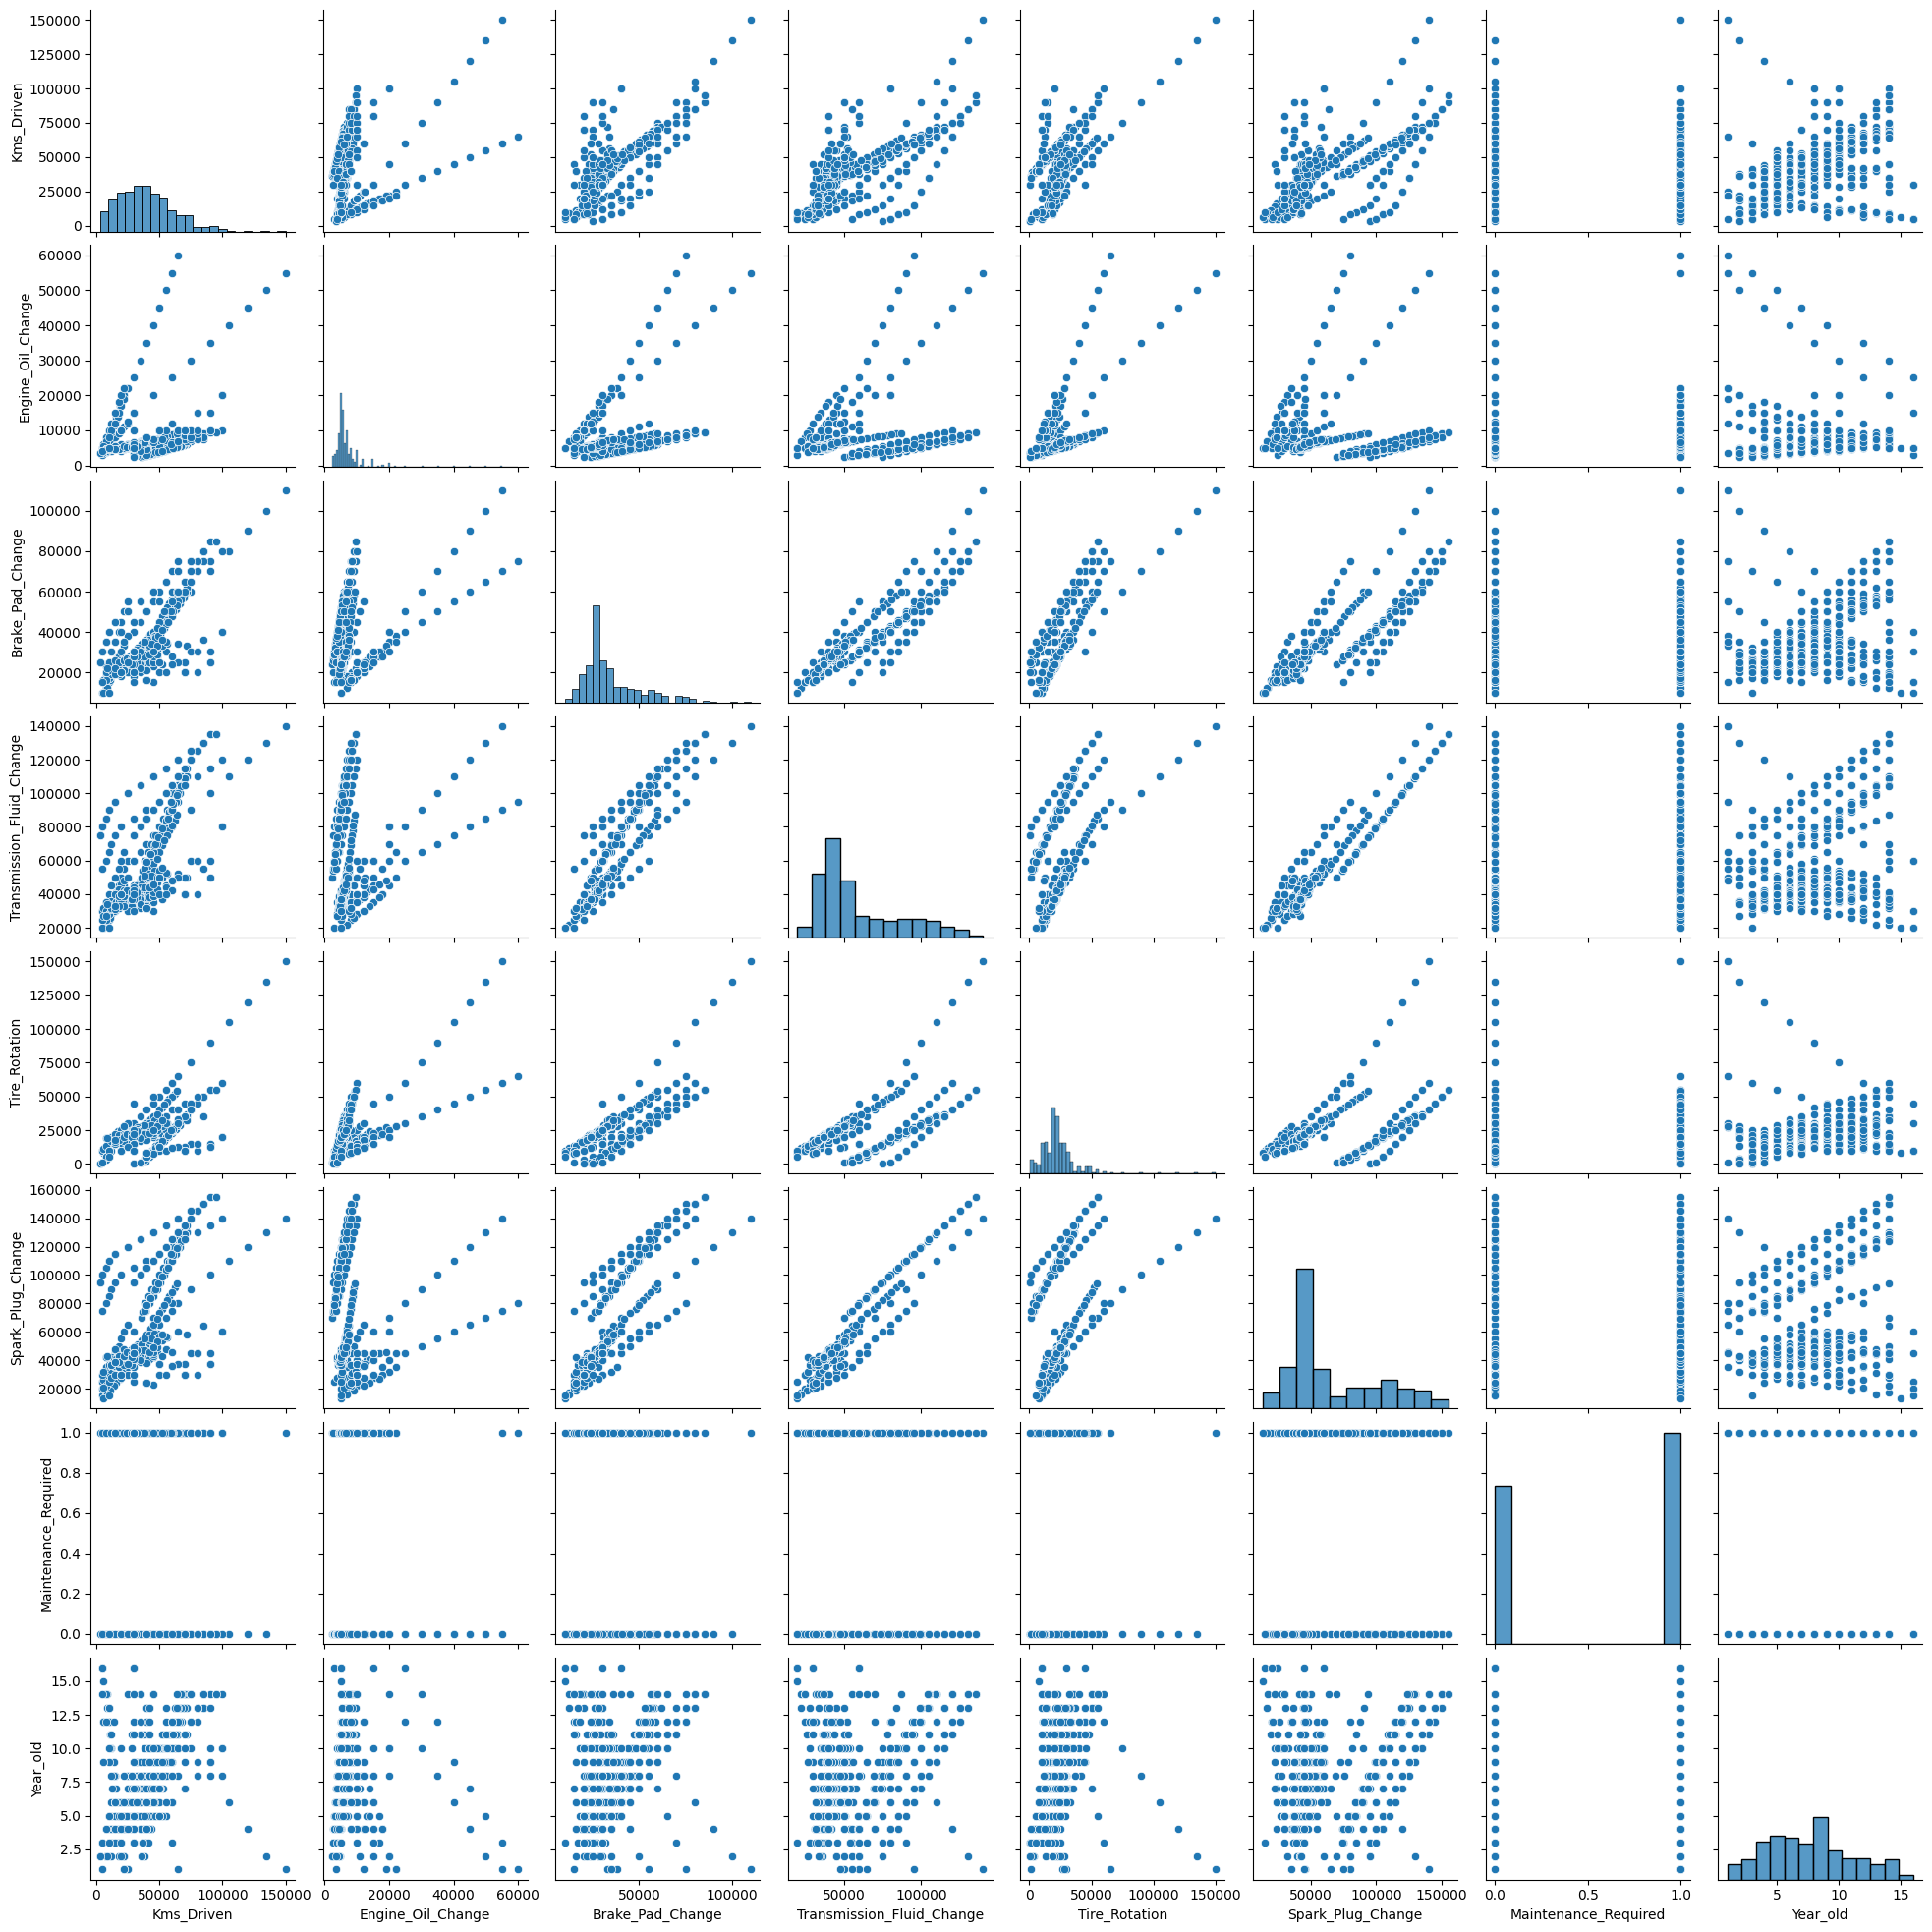

In [19]:
sns.pairplot(data)
# This shows the relationship for (n,2) combination of variable in a DataFrame 
# as a matrix of plots and the diagonal plots are the univariate plots.

array([[<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Engine_Oil_Change'}>,
        <Axes: title={'center': 'Brake_Pad_Change'}>],
       [<Axes: title={'center': 'Transmission_Fluid_Change'}>,
        <Axes: title={'center': 'Tire_Rotation'}>,
        <Axes: title={'center': 'Spark_Plug_Change'}>],
       [<Axes: title={'center': 'Maintenance_Required'}>,
        <Axes: title={'center': 'Year_old'}>, <Axes: >]], dtype=object)

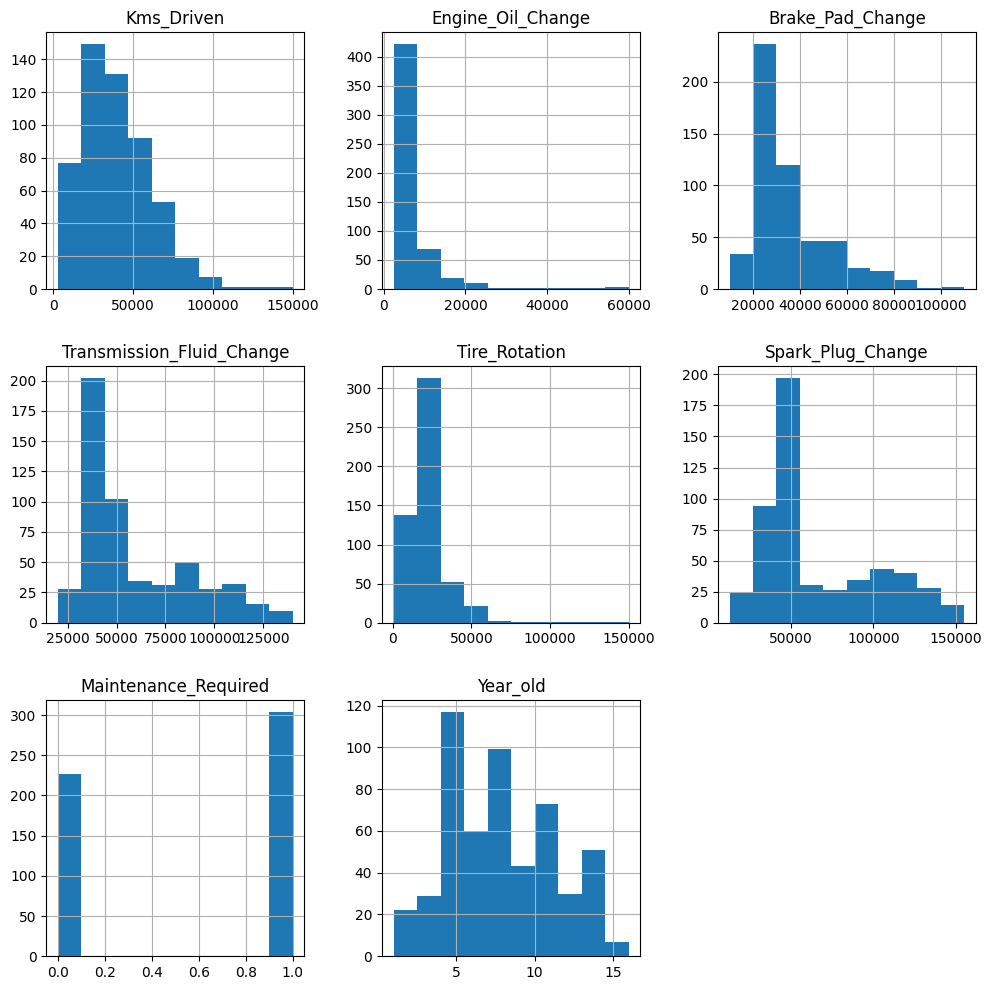

In [20]:
#to visualize the feature using histogram
data.hist(figsize=(12,12))

In [21]:
print(data.corr())


                           Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  \
Kms_Driven                   1.000000           0.322482          0.749172   
Engine_Oil_Change            0.322482           1.000000          0.386918   
Brake_Pad_Change             0.749172           0.386918          1.000000   
Transmission_Fluid_Change    0.695769           0.202865          0.921800   
Tire_Rotation                0.609651           0.635063          0.750217   
Spark_Plug_Change            0.612036           0.015752          0.862104   
Maintenance_Required        -0.095772          -0.092362         -0.129616   
Year_old                     0.405203          -0.034698          0.342763   

                           Transmission_Fluid_Change  Tire_Rotation  \
Kms_Driven                                  0.695769       0.609651   
Engine_Oil_Change                           0.202865       0.635063   
Brake_Pad_Change                            0.921800       0.750217   
Transmission_

<Axes: >

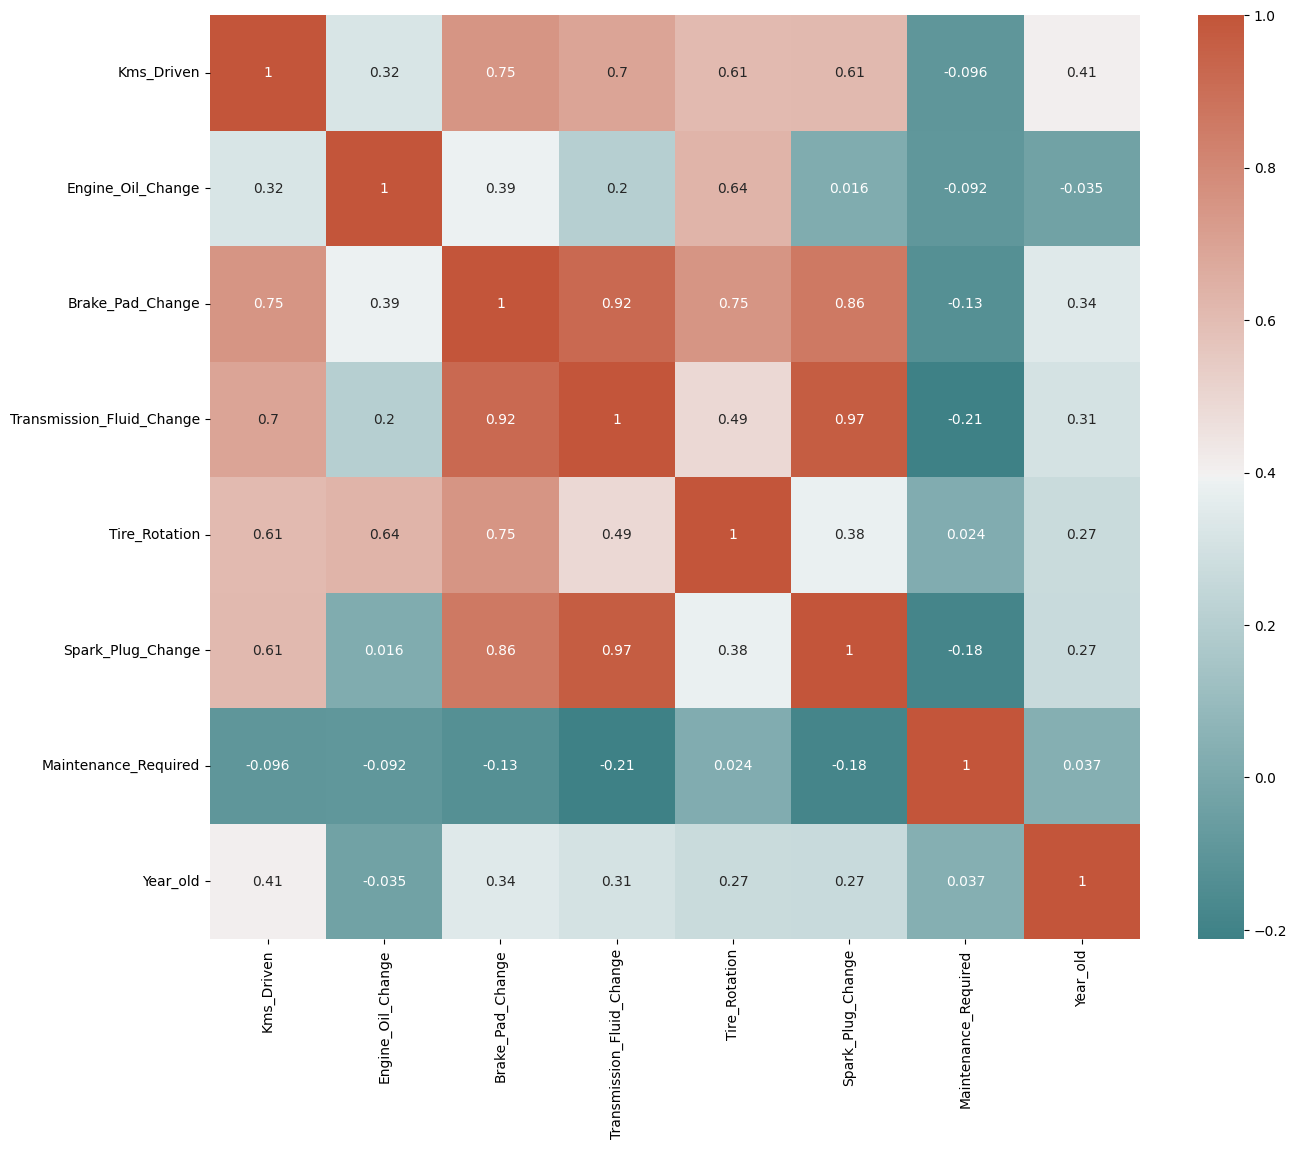

In [22]:
#correlation matrix
#it is to find the dependency of column to target value
corr = data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

In [23]:
#Training and testing
X = data.drop('Maintenance_Required',axis=1)
y = data['Maintenance_Required']

In [24]:
# Checking For Important Features!
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
model.feature_importances_

array([0.11773351, 0.16319817, 0.09627934, 0.13598103, 0.1881112 ,
       0.15971996, 0.13897679])

<Axes: >

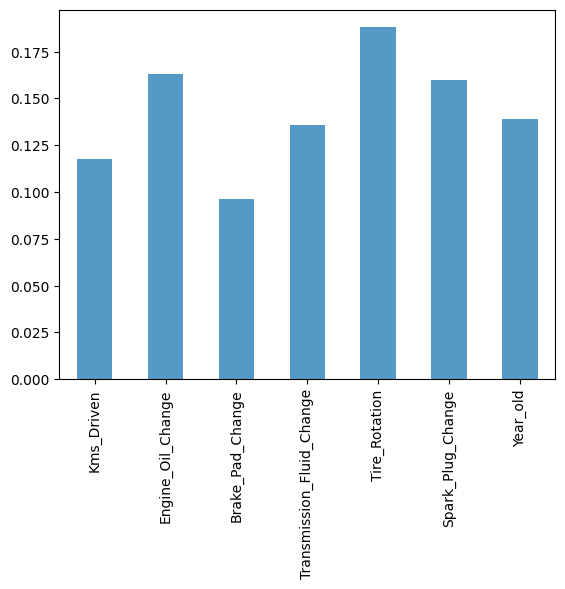

In [26]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90)

In [27]:
#statistical measures about the data
data.describe().T

count          mean           std      min  \
Kms_Driven                 531.0  39854.990584  22037.610830   3000.0   
Engine_Oil_Change          531.0   7705.084746   6792.317563   2400.0   
Brake_Pad_Change           531.0  34670.433145  15633.619180  10000.0   
Transmission_Fluid_Change  531.0  59325.800377  27474.950393  20000.0   
Tire_Rotation              531.0  23101.694915  14800.179019    500.0   
Spark_Plug_Change          531.0  66038.606403  34980.896635  13000.0   
Maintenance_Required       531.0      0.572505      0.495182      0.0   
Year_old                   531.0      7.657250      3.438302      1.0   

                               25%      50%      75%       max  
Kms_Driven                 24000.0  38000.0  52000.0  150000.0  
Engine_Oil_Change           5000.0   5800.0   7500.0   60000.0  
Brake_Pad_Change           25000.0  29000.0  40000.0  110000.0  
Transmission_Fluid_Change  40000.0  49000.0  80000.0  140000.0  
Tire_Rotation              15000.0  22000.0  27000.0  150000.0  
Spark_Plug_Change          42000.0  48000.0  95000.0  155000.0  
Maintenance_Required           0.0      1.0      1.0       1.0  
Year_old                       5.0      7.0     10.0      16.0

In [28]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=6)

In [29]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (424, 7)
Shape of y_train (424,)
Shape of X_test (107, 7)
Shape of y_test (107,)


Decision Tree
ACCURACY score on train data 79.95283018867924
Accuracy Score on test data 76.63551401869158
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.77      0.75        48
           1       0.80      0.76      0.78        59

    accuracy                           0.77       107
   macro avg       0.76      0.77      0.77       107
weighted avg       0.77      0.77      0.77       107
 

Confusion Matrix
 [[37 11]
 [14 45]]


<Axes: >

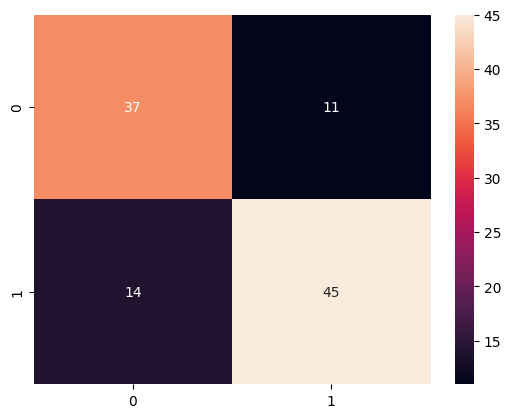

In [31]:
#Decision Tree
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( max_depth=5)
tree.fit(X_train, y_train)
pred=tree.predict(X_test)
acc=accuracy_score(y_test,pred)
#print("Acurray on test set: {:.2f}%".format(acc*100))
print("ACCURACY score on train data",accuracy_score(y_train, tree.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Naive Bayes
ACCURACY score on train data 62.02830188679245
ACCURACY on test data 61.6822429906542
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.35      0.45        48
           1       0.61      0.83      0.71        59

    accuracy                           0.62       107
   macro avg       0.62      0.59      0.58       107
weighted avg       0.62      0.62      0.59       107
 

Confusion Matrix [[17 31]
 [10 49]]


<Axes: >

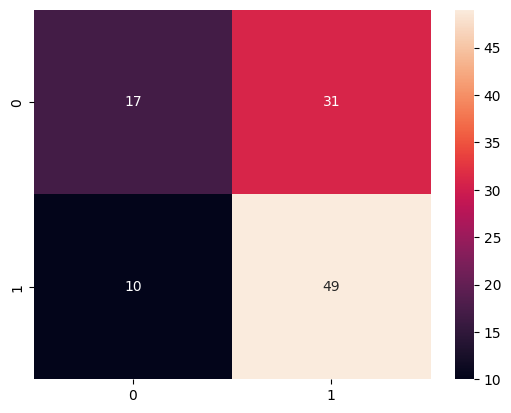

In [32]:
##Naive Bayes
print("Naive Bayes")
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, nb_model.predict(X_train))*100)
print("ACCURACY on test data",accuracy_score(y_test, pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Logistic Regression
ACCURACY score on train data 63.91509433962265
Accuracy Score on test data 63.55140186915887
Classification Report
               precision    recall  f1-score   support

           0       0.64      0.44      0.52        48
           1       0.64      0.80      0.71        59

    accuracy                           0.64       107
   macro avg       0.64      0.62      0.61       107
weighted avg       0.64      0.64      0.62       107
 

Confusion Matrix [[21 27]
 [12 47]]


<Axes: >

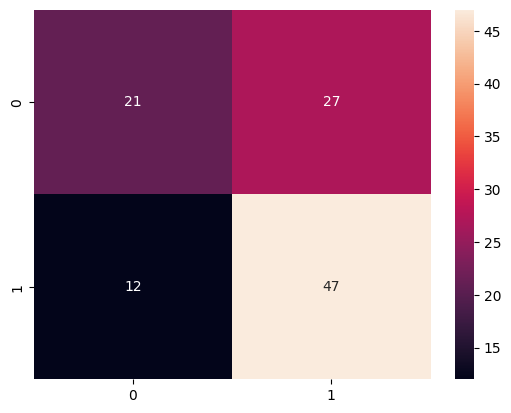

In [33]:
#Logistic Regression
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
#training the logistic regression model with training data
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, lr_model.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [34]:
#to find the best score of KNN - to get best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,40):
  knnn=KNeighborsClassifier(n_neighbors=k)
  knnn.fit(X_train,y_train)
  knn_scores.append(knnn.score(X_test,y_test))

print(f'Best choice of k: {np.argmax(knn_scores)+1}')

Best choice of k: 10


KNN
ACCURACY score on train data 77.83018867924528
Accuracy Score on test data 77.57009345794393
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        48
           1       0.80      0.80      0.80        59

    accuracy                           0.78       107
   macro avg       0.77      0.77      0.77       107
weighted avg       0.78      0.78      0.78       107
 

Confusion Matrix
 [[36 12]
 [12 47]]


<Axes: >

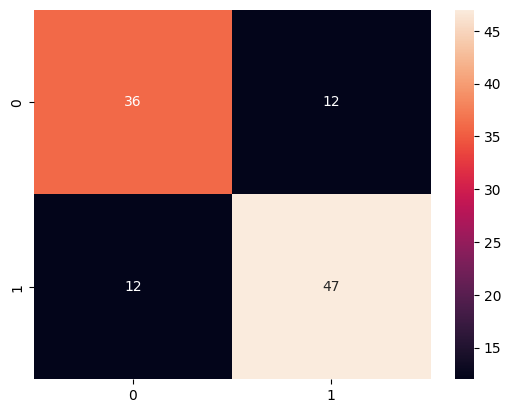

In [78]:
#KNN
print("KNN")
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=10,metric="minkowski")
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, KNN.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')


In [36]:
#to get best n_estimators for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_g={
    'n_estimators': range(1,1000,100),
}
rf=RandomForestClassifier()
rf_ran = RandomizedSearchCV(param_distributions=rf_g,estimator=rf,scoring="accuracy",verbose=0,n_iter=100,cv=4)
rf_ran.fit(X_train,y_train)
best_params=rf_ran.best_params_
print(best_params)

{'n_estimators': 601}


Random Forest Classification


ACCURACY score on train data 75.23584905660378
Accuracy Score on test data 71.02803738317756
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.58      0.64        48
           1       0.71      0.81      0.76        59

    accuracy                           0.71       107
   macro avg       0.71      0.70      0.70       107
weighted avg       0.71      0.71      0.71       107
 

Confusion Matrix [[28 20]
 [11 48]]


<Axes: >

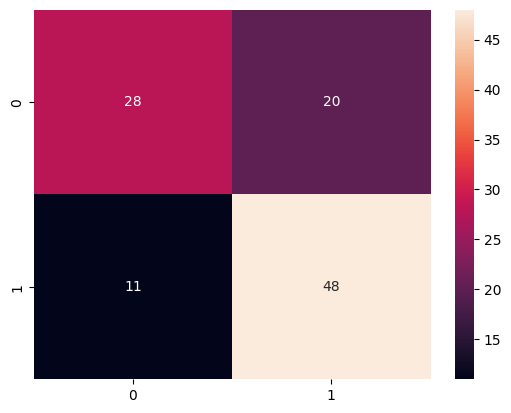

In [79]:
#Random Forest classifier
print("Random Forest Classification")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 601, criterion = 'entropy', random_state = 101,max_depth=4)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, rf_classifier.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [38]:
#to get best kernel for svm
from sklearn import svm
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

print(kernels, svc_scores)

['linear', 'poly', 'rbf', 'sigmoid'] [0.6915887850467289, 0.5981308411214953, 0.7383177570093458, 0.5233644859813084]


SVM
ACCURACY score on train data 66.98113207547169
Accuracy Score on test data 69.1588785046729
Classification Report
               precision    recall  f1-score   support

           0       0.70      0.54      0.61        48
           1       0.69      0.81      0.74        59

    accuracy                           0.69       107
   macro avg       0.69      0.68      0.68       107
weighted avg       0.69      0.69      0.68       107
 

Confusion Matrix [[26 22]
 [11 48]]


<Axes: >

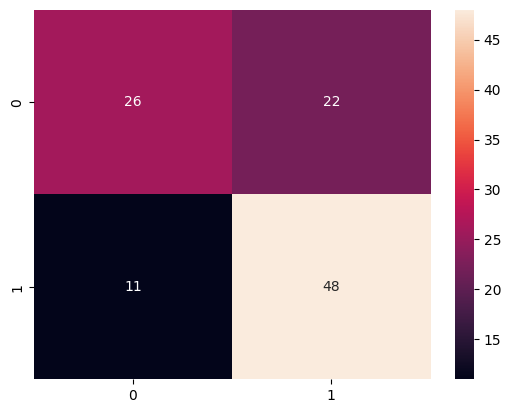

In [80]:
#SVM
print("SVM")
from sklearn import svm
sup = svm.SVC(kernel='linear')
sup.fit(X_train,y_train)
pred = sup.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, sup.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [81]:
#All Model Accuracy with Visual------6 models
Algo=[tree,KNN,nb_model,lr_model,rf_classifier,sup]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["Decision Tree","K Neighbors","Naive Bayes","Logistic Regression","Random Forest","SVM"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

Algorithms   Accuracy
0        Decision Tree  75.700935
1          K Neighbors  77.570093
2          Naive Bayes  61.682243
3  Logistic Regression  63.551402
4        Random Forest  71.028037
5                  SVM  69.158879

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'Naive Bayes'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'SVM')])

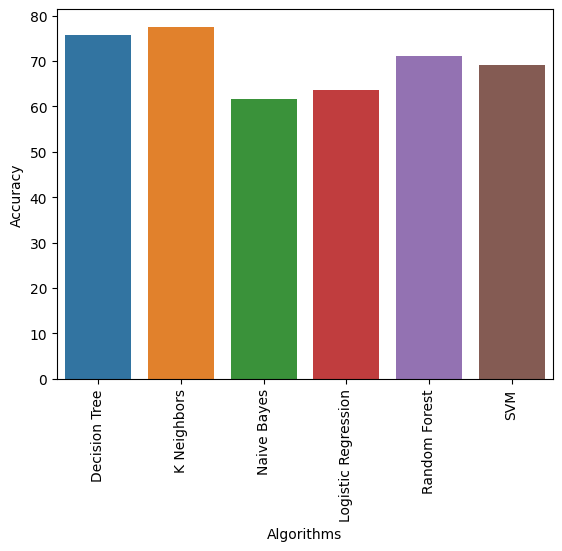

In [82]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)
plt.xticks(rotation=90) 

### **Exporting the tested model to a pickle file**

In [42]:
import pickle
with open('medium.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(KNN, file)

In [43]:
#To give input we show data here
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       30000              25000             40000                      60000   
1       35000              30000             45000                      65000   
2       40000              35000             50000                      70000   
3       45000              40000             55000                      75000   
4       50000              45000             60000                      80000   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0          30000              45000                     0        16  
1          35000              50000                     0        14  
2          40000              55000                     0        12  
3          45000              60000                     0         9  
4          50000              65000                     0         7

In [44]:
#Here we give input to model and predict
predicted = KNN.predict([[45000,3300,33000,65000,8000,85000,5]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 0
No need for maintenance


Applying Explainable AI


In [45]:
#importing shap 
import shap
import matplotlib.pyplot as plt

Variable Importance Plot - Global Interpretation


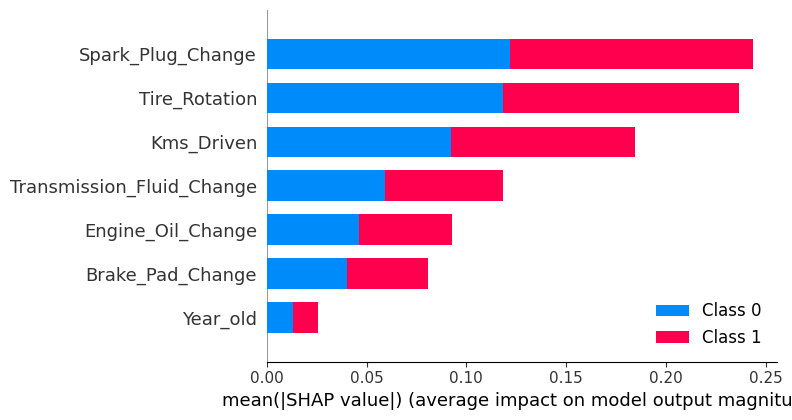

In [46]:
#Using decision Tree model
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(tree)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


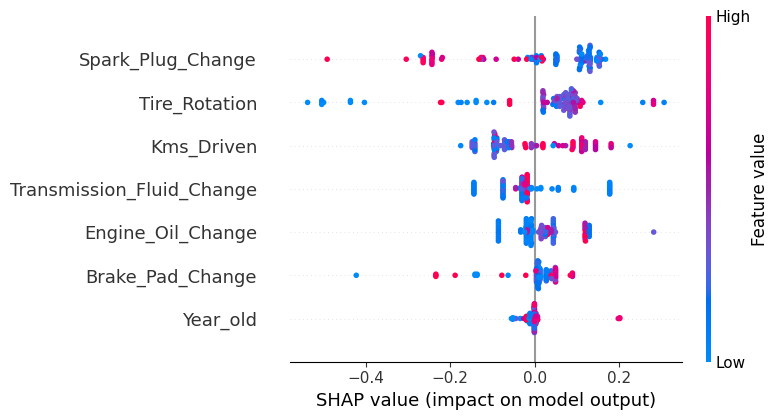

In [47]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

Variable Importance Plot - Global Interpretation


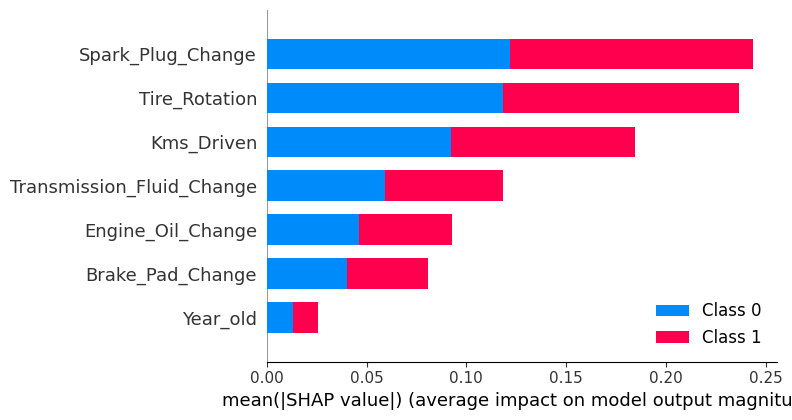

In [48]:
#Using Random Forest model
# Create the explainer
explainer1 = shap.TreeExplainer(rf_classifier)

shap_values1 = explainer1.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


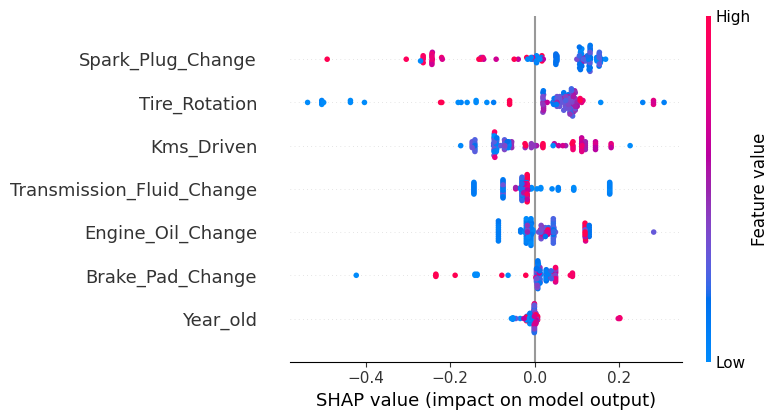

In [49]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

In [50]:
feature_importances = tree.feature_importances_

In [51]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(tree, X_train)

In [52]:
# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

In [53]:
# Make predictions
y_pred = tree.predict(X_test)

In [54]:
# Print individual SHAP explanations for a specific instance 
instance_index = 0
print("Predicted Class:", y_pred[instance_index])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[instance_index], X_test[instance_index])

Predicted Class: 1


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Kms_Driven'),
  Text(1, 0, 'Engine_Oil_Change'),
  Text(2, 0, 'Brake_Pad_Change'),
  Text(3, 0, 'Transmission_Fluid_Change'),
  Text(4, 0, 'Tire_Rotation'),
  Text(5, 0, 'Spark_Plug_Change'),
  Text(6, 0, 'Year_old')])

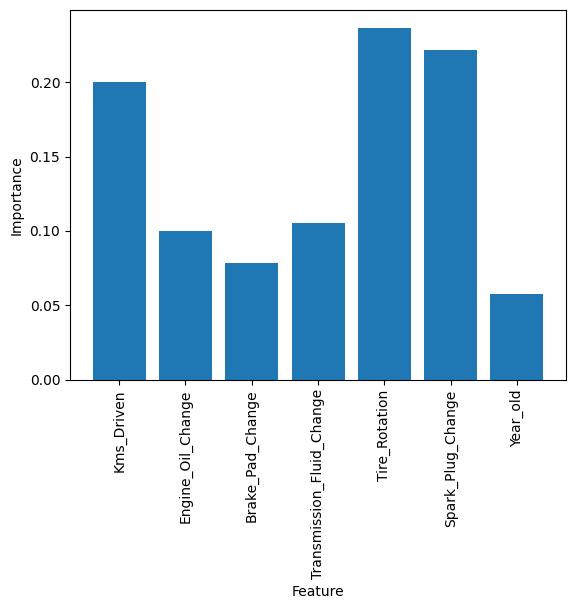

In [55]:
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90) 


In [56]:
#Importing LIME
import lime
from lime import lime_tabular

In [57]:
from interpret.blackbox import LimeTabular

In [58]:
from lime.lime_tabular import LimeTabularExplainer

In [59]:
from interpret import show

In [60]:
import pipeline

In [61]:
X_train_df = pd.DataFrame(X_train, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [62]:
X_test_df = pd.DataFrame(X_test, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [63]:
explainer = LimeTabularExplainer(training_data=X_train,
                                 mode="classification",
                                 feature_names=X.columns,
                                 class_names=["No need", "Need"],
                                 discretize_continuous=True,
                                 random_state=1)

In [64]:
predict_fn = lambda x: tree.predict_proba(x)

In [65]:
explanation = explainer.explain_instance(X_test_df.iloc[0], predict_fn, top_labels=1)

In [66]:
explanation.show_in_notebook()

In [67]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance = [(25000,5000,20000,30000,15000,40000,5)]

In [68]:
X_instance_array = np.array(X_instance)

# Reshape the NumPy array
X_instance_array = X_instance_array[np.newaxis, :]
X_instance_array = X_instance_array.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array)[0]

In [69]:
predict_fn = lambda x: tree.predict_proba(X_instance_array)

In [70]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array[0], tree.predict_proba, top_labels=1)

In [71]:
explanation1.show_in_notebook()

In [72]:
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       30000              25000             40000                      60000   
1       35000              30000             45000                      65000   
2       40000              35000             50000                      70000   
3       45000              40000             55000                      75000   
4       50000              45000             60000                      80000   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0          30000              45000                     0        16  
1          35000              50000                     0        14  
2          40000              55000                     0        12  
3          45000              60000                     0         9  
4          50000              65000                     0         7

In [73]:
#Here we give input to model and predict
predicted = lr_model.predict([[40000,5500,21000,33000,18000,38000,6]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 0
No need for maintenance


In [74]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance1 = [(40000,5500,21000,33000,18000,38000,6)]

In [83]:
X_instance_array1 = np.array(X_instance1)

# Reshape the NumPy array
X_instance_array1 = X_instance_array1[np.newaxis, :]
X_instance_array1 = X_instance_array1.reshape(1, -1)
# Get the model's prediction
prediction = KNN.predict(X_instance_array1)[0]

In [84]:
predict_fn = lambda x: KNN.predict_proba(X_instance_array1)

In [85]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array1[0], KNN.predict_proba, top_labels=1)
explanation1.show_in_notebook()